In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
sns.set_context('poster')
import glob
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, plot_roc_curve
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance
import os

%load_ext autoreload
%autoreload 2

In [2]:
path_prefix = '../scripts/graph_approaches/'
import sys
sys.path.append(path_prefix)
from util import resolution_util as ru
from util import plot_util as pu
# from util import ml_util as mu
import atlas_mpl_style as ampl
ampl.set_color_cycle('Oceanic',10)
# plt.style.use('paper')

In [3]:
# data_dir = '../results/Block_20210831_1455_simult_optimized/'
data_dir = 'results/onetrack_multicluster/Block_large_20220512_1623_track_regress_noCell_nClusters/'
# data_dir = '../results/Block_20210831_1459_simult_concatClass_optimized/'
# data_dir = '../results/Nearest_20211019_0757_nearest_weightedRegress_optimized/'

In [4]:
hist_files = np.sort(glob.glob(data_dir + 'losses.npz'))
print('Loading form {}'.format(data_dir))


hist = np.load(hist_files[0])

Loading form results/onetrack_multicluster/Block_large_20220512_1623_track_regress_noCell_nClusters/


Loading form results/onetrack_multicluster/Block_large_20220512_1623_track_regress_noCell_nClusters/


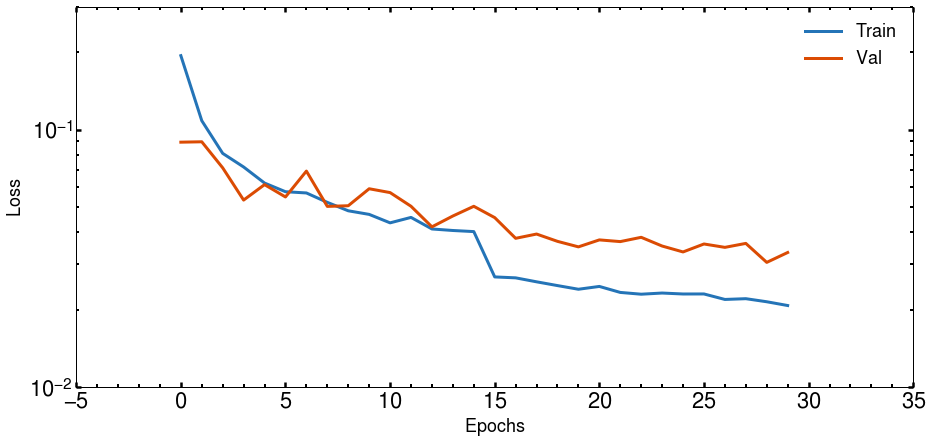

In [5]:
pion_list = ['pion']
sym_list = ['+-',]
concat_type = ['False']
model_name = ['ConcatFalse']
line = ['-', '--', ':']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

plt.figure(figsize=(15,7))
# print('\nPlotting losses fro {}'.format(data_dir))
hist_files = np.sort(glob.glob(data_dir + 'losses.npz'))
print('Loading form {}'.format(data_dir))


hist = np.load(hist_files[0])
plt.semilogy(hist['training'].mean(axis=1), color=blues[5, :3], 
             label=r'$Train$', linestyle=line[0])
plt.semilogy(hist['validation'].mean(axis=1), color=oranges[5, :3], 
             label=r'$Val$', linestyle=line[0])


plt.ylabel(r'$Loss$')
plt.xlabel(r'$Epochs$')
plt.ylim([1e-2, 3e-1])
# sns.despine()
plt.legend()
plt.savefig(data_dir+'/training_mse.png', bbox_inches='tight', dpi=300)
plt.show()


In [6]:
pred_file = data_dir+'/inference_predictions.npz'
predictions = np.load(pred_file)
targets_regress = predictions['targets']
outputs_regress = predictions['outputs'][:, 0]

targets_regress.shape, outputs_regress.shape

((2469658,), (2469658,))

In [7]:
def make_response_plot(y_true, y_pred, pion_label, f_name=''):
    y_ratio = y_pred/y_true

    p_r = pearsonr(y_true,y_pred)[0]
    s_r = spearmanr(y_true,y_pred)[0]
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    mae = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print("r2:{:.3f}".format(r2))
    print("PearsonR:{:.3f}, SpearmanR:{:.3f}, RMSE:{:.3f}, MAE:{:.3f}".
          format(p_r, s_r, rmse, mae))
    pion_label = pion_label+f'\n$PearsonR: {p_r:.3f}, SpearmanR: {s_r:.3f}$\n$RMSE: {rmse:.3f}, MAE: {mae:.3f}$'
    xcenter, medRegCNN = ru.responsePlot(y_true, y_ratio,
                                         figfile = f_name,
                                         statistic = 'median',
                                         atlas_x = 0.4, atlas_y = 0.95, simulation = True,
                                         textlist = [{'x': 0.4, 'y': 0.75, 'text': pion_label}])
    return xcenter, medRegCNN


Plotting $\pi^{\pm}$
r2:0.976
PearsonR:0.989, SpearmanR:0.997, RMSE:71.187, MAE:28.837
Saving figure to results/onetrack_multicluster/Block_large_20220512_1623_track_regress_noCell_nClusters/pion_response.pdf


'NimbusSans-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSans-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


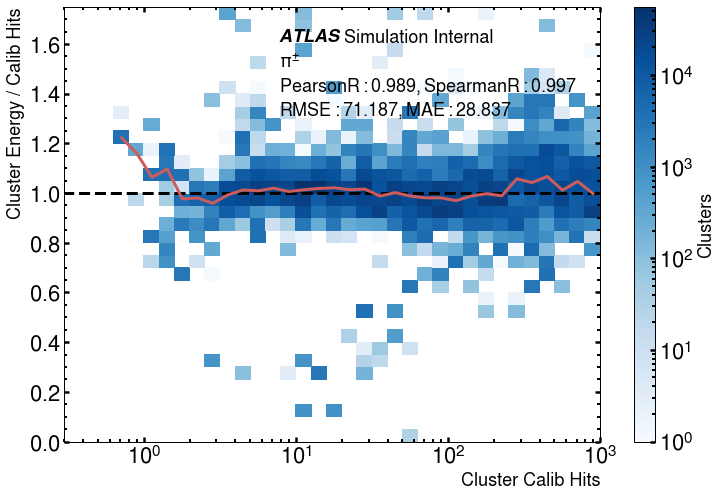

In [8]:
c_map = sns.color_palette("Blues")

pion_list = ['$\pi^{all}$', '$\pi^{0}$', '$\pi^{\pm}$']
sym_list = ['', '0', '+-']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

response_median = []

# print('\nPlotting {}'.format(pion_list[0]))
# y_true = targets_regress
# y_pred = outputs_regress
# xcenter, medRegCNN = make_response_plot(y_true, y_pred, pion_list[0], f_name=data_dir+'pi_all_response.pdf')
# response_median.append(medRegCNN)

# print('\nPlotting {}'.format(pion_list[1]))
# y_true = targets_regress[targets_class==0]
# y_pred = outputs_regress[targets_class==0]
# xcenter, medRegCNN = make_response_plot(y_true, y_pred, pion_list[1], f_name=data_dir+'pi0_response.pdf')
# response_median.append(medRegCNN)

print('\nPlotting {}'.format(pion_list[2]))
y_true = targets_regress  # [targets_class==1]
y_pred = outputs_regress  # [targets_class==1]
xcenter, medRegCNN = make_response_plot(y_true, y_pred, pion_list[2], f_name=data_dir+'pion_response.pdf')
response_median.append(medRegCNN)

np.savez(data_dir+'/response_medians.npz', response_median=response_median, xcenter=xcenter)

extra_line [[0, 10000.0], [1, 1]]
['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 799.992x599.976 with 0 Axes>

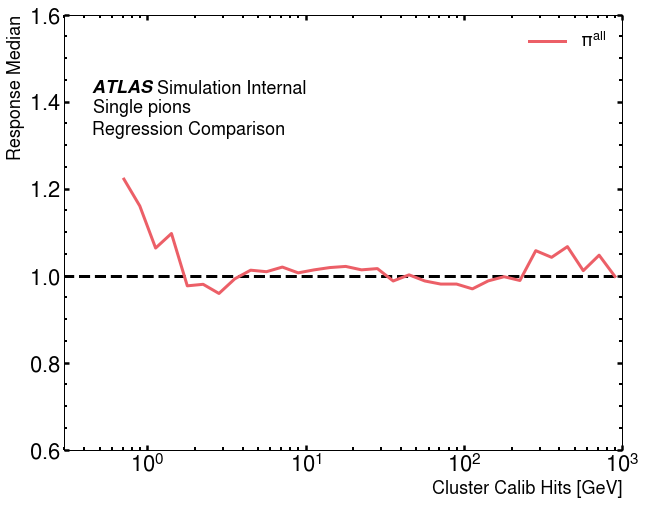

In [9]:
pu.lineOverlay(xcenter=xcenter, lines=response_median,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{all}$', r'$\pi^{0}$', r'$\pi^{\pm}$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response Median',
                figfile = '', # medResponse_gnBlock.png',
                y_max=1.6, y_min=.6, x_min = .3, colorgrouping=0,
                extra_lines= [[[0, 10e3], [1, 1]]],
                linestyles = ['solid', 'solid', 'solid'], # , 'dashed',],
                atlas_x = 0.05, atlas_y = 0.85, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.775, 'text': 'Single $pions$'},
                            {'x': 0.05, 'y': 0.725,  'text': 'Regression Comparison'}])

In [10]:
def make_hist_plot(y_true, y_pred, pion_label, f_name=None):
    print('Wasserstein distance: {:.3f}'.format(wasserstein_distance(y_true, y_pred)))
    fig = plt.figure(figsize=(20,10))
    plt.hist(y_true, bins=np.linspace(-1., 4., 100), alpha=.5, label=r'$True$')
    plt.hist(y_pred, bins=np.linspace(-1., 4., 100), alpha=.5, label=r'$Predicted$')
    plt.legend(loc='upper right')
    plt.xlabel(r'$Log\ values$')
    plt.ylabel(r'$Counts$')
    plt.xlim([-1.5, 4.])

    atlas_x = 0.55 
    atlas_y = 0.95 
    simulation = True
    textlist = [{'x': 0.55, 'y': 0.88, 'text': pion_label},
                {'x': 0.55, 'y': 0.83, 'text': 'Wasserstein distance: {:.4f}'.format(wasserstein_distance(y_true, y_pred))}]

    pu.drawLabels(fig, atlas_x, atlas_y, simulation, textlist)
    # sns.despine()
    if f_name:
        plt.savefig(f_name)
    plt.show()


Plotting $\pi^{\pm}$
Wasserstein distance: 0.012


'NimbusSans-BoldItalic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusSans-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


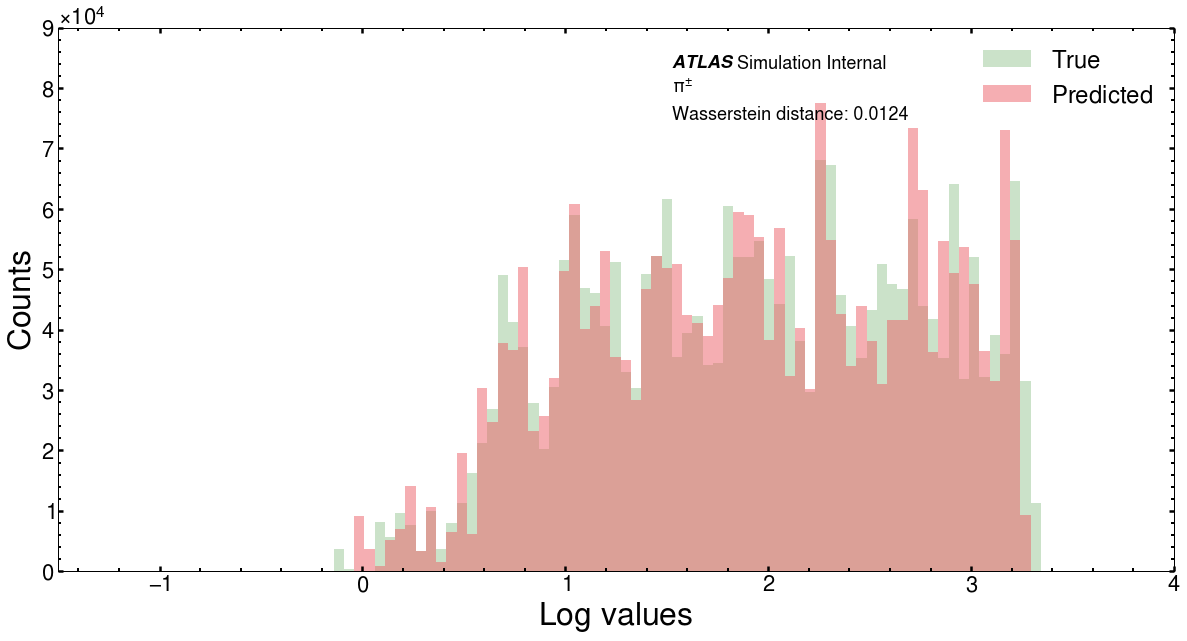

In [11]:
import atlas_mpl_style as ampl
ampl.use_atlas_style()

# set plotsytle choices here
params = {'legend.fontsize': 24,
          'axes.labelsize': 32}
plt.rcParams.update(params)

ampl.set_color_cycle('Oceanic',10)

c_map = sns.color_palette("Blues")

pion_list = ['$\pi^{all}$', '$\pi^{0}$', '$\pi^{\pm}$']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

# print('\nPlotting {}'.format(pion_list[0]))
# y_true = np.log10(targets_regress)
# y_pred = np.log10(outputs_regress)
# make_hist_plot(y_true, y_pred, pion_list[0], f_name=data_dir+'pi_all_dist.pdf')

# print('\nPlotting {}'.format(pion_list[1]))
# y_true = np.log10(targets_regress[targets_class==0])
# y_pred = np.log10(outputs_regress[targets_class==0])
# make_hist_plot(y_true, y_pred, pion_list[1], f_name=data_dir+'pi0_dist.pdf')

print('\nPlotting {}'.format(pion_list[2]))
y_true = np.log10(targets_regress)
y_pred = np.log10(outputs_regress)
make_hist_plot(y_true, y_pred, pion_list[2], f_name=data_dir+'pion_dist.pdf')


Plotting $\pi^{\pm}$


<Figure size 799.992x599.976 with 0 Axes>

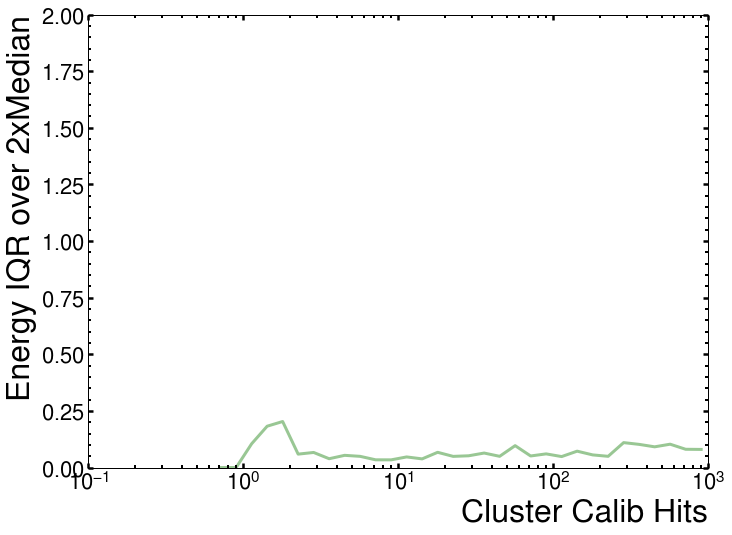

In [12]:
iqr = []
# print('\nPlotting {}'.format(pion_list[0]))
# y_true = targets_regress
# y_pred = outputs_regress
# y_ratio = y_pred/y_true
# xcenter, iqr_curr= ru.resolutionPlot(y_true, y_ratio, statistic='iqrOverMed')
# iqr.append(iqr_curr)

# print('\nPlotting {}'.format(pion_list[1]))
# y_true = targets_regress[targets_class==0]
# y_pred = outputs_regress[targets_class==0]
# y_ratio = y_pred/y_true
# xcenter, iqr_curr= ru.resolutionPlot(y_true, y_ratio, statistic='iqrOverMed')
# iqr.append(iqr_curr)

print('\nPlotting {}'.format(pion_list[2]))
y_true = targets_regress # [targets_class==1]
y_pred = outputs_regress# [targets_class==1]
y_ratio = y_pred/y_true
xcenter, iqr_curr= ru.resolutionPlot(y_true, y_ratio, statistic='iqrOverMed')
iqr.append(iqr_curr)

np.savez(data_dir+'/iqr.npz', response_median=iqr, xcenter=xcenter)

['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 799.992x599.976 with 0 Axes>

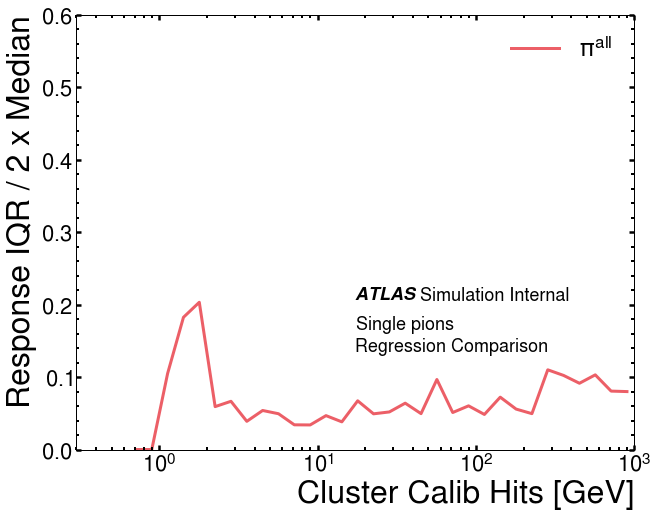

In [13]:
pu.lineOverlay(xcenter=xcenter, lines = iqr,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{all}$', r'$\pi^{0}$', r'$\pi^{\pm}$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response IQR / 2 x Median',
                figfile = '', # 'iqr_gnBlock.png',
                y_max = .6, x_min = .3,
                linestyles = ['solid', 'solid', 'solid'],  # , 'dashed',],
                atlas_x = 0.5, atlas_y = 0.375, simulation = True,
                textlist = [{'x': 0.5, 'y': 0.275, 'text': 'Single $pions$'},
                            {'x': 0.5, 'y': 0.225,  'text': 'Regression Comparison'}])

In [14]:
df = pd.read_pickle(data_dir+'track_meta_df.pkl')

In [15]:
df

,trackPt,trackD0,trackZ0,trackEta_EMB2,trackPhi_EMB2,trackEta,trackPhi,truthPartE,truthPartPt
0,372.885345,-0.015541,-18.883480,1.391900e+00,2.761579e-01,1.391900,0.277526,894.222229,418.777832
1,61.723095,-0.015939,39.476242,-1.000000e+09,-1.000000e+09,-1.502438,-1.042793,131.272079,55.660706
2,32.666668,-0.001531,-3.308790,-1.000000e+09,-1.000000e+09,2.212801,-2.129071,155.135071,33.546608
3,98.651421,0.016743,-0.335568,6.755152e-02,-1.430960e+00,0.067553,-1.438497,99.480408,99.257202
4,372.885345,-0.015541,-18.883480,1.391900e+00,2.761579e-01,1.391900,0.277526,894.222229,418.777832
...,...,...,...,...,...,...,...,...,...
182,172.870956,0.016391,-4.252361,-1.000000e+09,-1.000000e+09,2.117922,-2.434598,690.988342,163.825455
183,55.103134,-0.002724,54.428211,-1.000000e+09,-1.000000e+09,2.349320,2.331475,289.852997,54.835293
184,8.850031,-0.016723,-26.080801,-7.146134e-01,1.767172e+00,-0.714963,1.848666,11.047460,8.718698
185,8.850031,-0.016723,-26.080801,-7.146134e-01,1.767172e+00,-0.714963,1.848666,11.047460,8.718698


In [16]:
sns.histplot(data=df, x='delta')
plt.yscale('log')
plt.show()

ValueError: Could not interpret value `delta` for parameter `x`